In [12]:
# Import the relevant modules
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
data = load_breast_cancer()

In [3]:
# Check data properties
print("Type:", type(data))

Type: <class 'sklearn.utils.Bunch'>


In [29]:
print("Keys:", data.keys()) # Shows the keys of the data
print("Shape:", data.data.shape) # Check the shape of X
print("Targets:", data.target.shape) # Check the shape of Y
print("Feature Names:", data.feature_names) # Print the input feature names
print("Targets Names:", data.target_names)

Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape: (569, 30)
Targets: (569,)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Targets Names: ['malignant' 'benign']


In [30]:
# We split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [31]:
# We scale the data
# StandardScaler is used for normalizing the data
# This is to prevent inputs from having very different ranges

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
# We build the model
# Sigmoid to make sure the output is 0/1 

"""
Motivation - numerical instability.
Exponential numbers tend to be very large
In the sigmoid, the operation is exponential, which is unstable
The log term in Binary Cross-Entropy is unstable, because of similar reasons
Because the BCE has a log, it cancels our the exponential.
For both Sigmoid and BCE, these can be combined, and express the loss in terms of the activation (aka logit)
The logit is the input into the logistic/sigmoid function.
"""

model = nn.Linear(D, 1)

In [33]:
# Loss and optimizer

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [34]:
# We convert the data into Torch Tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

# Targets are reshaped to be 2D arrays of shape Nx1
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [35]:
# Train the model
number_epochs = 2000
train_losses = np.zeros(number_epochs)
test_losses = np.zeros(number_epochs)

for iteration in range(number_epochs):

    # We train the model
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # We are also interested in the test/validation loss, to make sure we are not overtiffing
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # We save the losses
    train_losses[iteration] = loss.item()
    test_losses[iteration] = loss_test.item()

    if (iteration+1) % 50 == 0:
        print("Epoch: {}/{}, Train Loss: {:.5f}, Test Loss: {:.5f}".format(iteration+1, number_epochs, loss.item(), loss_test.item()))

Epoch: 50/2000, Train Loss: 0.51567, Test Loss: 0.53245
Epoch: 100/2000, Train Loss: 0.37399, Test Loss: 0.39915
Epoch: 150/2000, Train Loss: 0.29723, Test Loss: 0.32608
Epoch: 200/2000, Train Loss: 0.24937, Test Loss: 0.27995
Epoch: 250/2000, Train Loss: 0.21679, Test Loss: 0.24800
Epoch: 300/2000, Train Loss: 0.19326, Test Loss: 0.22449
Epoch: 350/2000, Train Loss: 0.17549, Test Loss: 0.20640
Epoch: 400/2000, Train Loss: 0.16160, Test Loss: 0.19201
Epoch: 450/2000, Train Loss: 0.15043, Test Loss: 0.18025
Epoch: 500/2000, Train Loss: 0.14123, Test Loss: 0.17042
Epoch: 550/2000, Train Loss: 0.13351, Test Loss: 0.16207
Epoch: 600/2000, Train Loss: 0.12693, Test Loss: 0.15487
Epoch: 650/2000, Train Loss: 0.12125, Test Loss: 0.14859
Epoch: 700/2000, Train Loss: 0.11628, Test Loss: 0.14306
Epoch: 750/2000, Train Loss: 0.11190, Test Loss: 0.13814
Epoch: 800/2000, Train Loss: 0.10800, Test Loss: 0.13374
Epoch: 850/2000, Train Loss: 0.10450, Test Loss: 0.12977
Epoch: 900/2000, Train Loss: 0.1

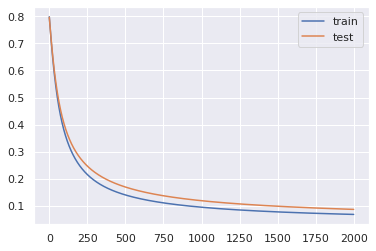

In [36]:
# Plot the train and test losses
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.legend()
plt.show()

In [37]:
# Get the accuracy
# Sigmoid always outputs a number between 0 and 1 and this is a probability
# For logits, the predictions are positive or negative (sides of hyperplane)
with torch.no_grad():
    p_train = model(X_train) # Calculate the prediction
    p_train = (p_train.numpy()> 0) # convert tensors to np, and round them
    train_accuracy = np.mean(y_train.numpy() == p_train) # point-wise comparison and take the mean

    p_test = model(X_test)
    p_test = (p_test.numpy() > 0)
    test_accuracy = np.mean(y_test.numpy() == p_test)

print('Train Accuracy: {}, Test Accuracy: {}'.format(train_accuracy, test_accuracy))

Train Accuracy: 0.9868766404199475, Test Accuracy: 0.9840425531914894
